In [1]:
import pandas as pd 

In [2]:
df= pd.read_csv('/Users/nirmalsingh/Desktop/Learning Datasets/Amazon Fine Food Reviews/Reviews.csv')

In [3]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [4]:
df1= df[df['Score']!=3]

In [5]:
df.shape

(568454, 10)

In [6]:
df1.shape

(525814, 10)

In [7]:
df1[df1['HelpfulnessNumerator']>df1['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


clearly the above rows are invalid as HelpfulnessNumerator can't be greater than HelpfulnessDenominator

In [8]:
df_valid=df1[df1['HelpfulnessNumerator']<=df1['HelpfulnessDenominator']]

In [9]:
df_valid.shape

(525812, 10)

In [10]:
data=df_valid.drop_duplicates(subset=['UserId','ProfileName','Time','Text'])

In [11]:
data.shape

(364171, 10)

In [12]:
data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

The data type of the Time column is incorrect so the Column data type should be changed 

In [13]:
data['Time']

0         1303862400
1         1346976000
2         1219017600
3         1307923200
4         1350777600
             ...    
568449    1299628800
568450    1331251200
568451    1329782400
568452    1331596800
568453    1338422400
Name: Time, Length: 364171, dtype: int64

In [57]:
data['Time']=pd.to_datetime(data['Time'],unit='s') 

In [56]:
import warnings 
from warnings import filterwarnings 
filterwarnings('ignore')

Problem Statement:- Analyze to what users Amazon can recommend more product?

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
recommend_df = data.groupby(['UserId']).agg({'Summary':'count' , 'Text':'count' , 'Score':'mean' ,'ProductId':'count'  }).sort_values(by='ProductId' , ascending=False)

In [18]:
recommend_df

,Summary,Text,Score,ProductId
UserId,,,,
AY12DBB0U420B,310,310,4.761290,310
A3OXHLG6DIBRW8,264,264,4.628788,264
A281NPSIMI1C2R,240,240,4.929167,240
A1YUL9PCJR3JTY,205,205,4.692683,205
A1Z54EM24Y40LL,187,187,4.561497,187
...,...,...,...,...
A2E0C9H49TCK4R,1,1,5.000000,1
A2E0CQ47OKBVSJ,1,1,4.000000,1
A2E0D4XK0EYZ49,1,1,5.000000,1


In [19]:
recommend_df.columns = ['Number_of_summaries' , 'num_text' , 'avg_score' , 'No_of_prods_purchased']

In [20]:
recommend_df

,Number_of_summaries,num_text,avg_score,No_of_prods_purchased
UserId,,,,
AY12DBB0U420B,310,310,4.761290,310
A3OXHLG6DIBRW8,264,264,4.628788,264
A281NPSIMI1C2R,240,240,4.929167,240
A1YUL9PCJR3JTY,205,205,4.692683,205
A1Z54EM24Y40LL,187,187,4.561497,187
...,...,...,...,...
A2E0C9H49TCK4R,1,1,5.000000,1
A2E0CQ47OKBVSJ,1,1,4.000000,1
A2E0D4XK0EYZ49,1,1,5.000000,1


In [21]:
recommend_df.index[0:10]

Index(['AY12DBB0U420B', 'A3OXHLG6DIBRW8', 'A281NPSIMI1C2R', 'A1YUL9PCJR3JTY',
       'A1Z54EM24Y40LL', 'A3D6OI36USYOU1', 'A2MUGFV2TDQ47K', 'AZV26LP92E6WU',
       'AKMEY1BSHSDG7', 'A2GEZJHBV92EVR'],
      dtype='object', name='UserId')

In [22]:
recommend_df['No_of_prods_purchased'][0:10].values

array([310, 264, 240, 205, 187, 136, 136, 123, 118, 111])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'AY12DBB0U420B'),
  Text(1, 0, 'A3OXHLG6DIBRW8'),
  Text(2, 0, 'A281NPSIMI1C2R'),
  Text(3, 0, 'A1YUL9PCJR3JTY'),
  Text(4, 0, 'A1Z54EM24Y40LL'),
  Text(5, 0, 'A3D6OI36USYOU1'),
  Text(6, 0, 'A2MUGFV2TDQ47K'),
  Text(7, 0, 'AZV26LP92E6WU'),
  Text(8, 0, 'AKMEY1BSHSDG7'),
  Text(9, 0, 'A2GEZJHBV92EVR')])

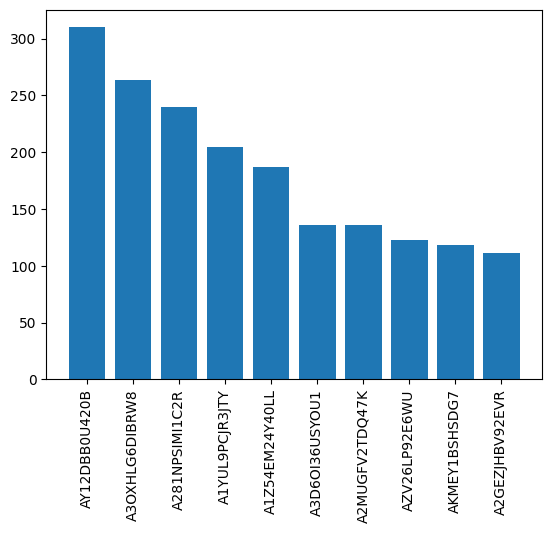

In [23]:
plt.bar(recommend_df.index[0:10],recommend_df['No_of_prods_purchased'][0:10].values)
plt.xticks(rotation='vertical')

The above graph tells about the UserId and the count of number of prodcucts purchased by each of them 

Problem Statement 2:- Analyzing whixh frequent sold product has good number of reviews ?(Here Frequent or very often sold products is considered which is purchased by more than 500 times)

In [24]:
prod_count = data['ProductId'].value_counts().to_frame()

In [25]:
prod_count

,ProductId
B007JFMH8M,856
B002QWP89S,609
B003B3OOPA,597
B001EO5Q64,551
B000NMJWZO,533
...,...
B005UTA8JE,1
B000H11DJ4,1
B00469TL7E,1
B0046TZTFC,1


In [26]:
prod_count[prod_count['ProductId']>500]

,ProductId
B007JFMH8M,856
B002QWP89S,609
B003B3OOPA,597
B001EO5Q64,551
B000NMJWZO,533
B005K4Q37A,513
B0013NUGDE,512
B000UBD88A,505


In [27]:
freq_prod_ids = prod_count[prod_count['ProductId']>500].index

In [28]:
freq_prod_ids

Index(['B007JFMH8M', 'B002QWP89S', 'B003B3OOPA', 'B001EO5Q64', 'B000NMJWZO',
       'B005K4Q37A', 'B0013NUGDE', 'B000UBD88A'],
      dtype='object')

Now filtering the DataFrame for the further analysis 

In [29]:
data['ProductId'].isin(freq_prod_ids)

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Name: ProductId, Length: 364171, dtype: bool

In [30]:
mostbought = data[data['ProductId'].isin(freq_prod_ids)]

In [31]:
mostbought

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
20982,20983,B002QWP89S,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,2011-10-18,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...
20983,20984,B002QWP89S,A17TDUBB4Z1PEC,jaded_green,1,1,5,2011-10-14,genuine Greenies best price,"These are genuine Greenies product, not a knoc..."
20984,20985,B002QWP89S,ABQH3WAWMSMBH,tenisbrat87,1,1,5,2011-09-28,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d..."
20985,20986,B002QWP89S,AVTY5M74VA1BJ,tarotqueen,1,1,5,2011-09-24,dogs love greenies,"What can I say, dogs love greenies. They begg ..."
20986,20987,B002QWP89S,A13TNN54ZEAUB1,dcz2221,1,1,5,2011-09-23,Greenies review,This review is for a box of Greenies Lite for ...
...,...,...,...,...,...,...,...,...,...,...
563878,563879,B007JFMH8M,A366PSH7KFLRPB,TheRosySnail,0,0,5,2012-07-29,Yummy!,I loved these cookies and so did my kids. You ...
563879,563880,B007JFMH8M,A2KV6EYQPKJRR5,Kelley,0,0,5,2012-07-28,Quaker Soft Baked Cookies,This is a great tasting cookie. It is very sof...
563880,563881,B007JFMH8M,A3O7REI0OSV89M,Esme,0,0,4,2012-07-28,Delicious!,These are great for a quick snack! They are sa...
563881,563882,B007JFMH8M,A9JS5GQQ6GIQT,Syne,0,0,5,2012-07-28,yummy,I love the Quaker soft baked cookies. The rea...


In [32]:
mostbought.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

<Axes: xlabel='count', ylabel='ProductId'>

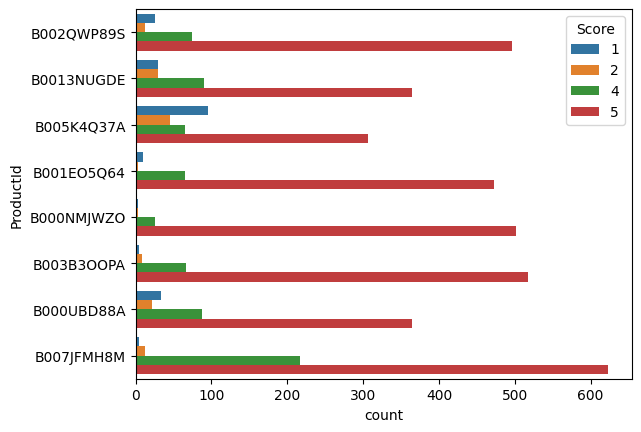

In [33]:
sns.countplot(y = 'ProductId' , data = mostbought , hue='Score')

In [34]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

Problem Statement 3:- Is there any difference between behaviour of frequent viewers & not frequent viewers?
    Consider the frquent viewers as viewers more than purchasing 50 times

In [54]:
x=data['UserId'].value_counts()

In [55]:
data['viewer_type']=data['UserId'].apply(lambda user:"frequent" if x[user]>=50 else "not-frequent")

In [39]:
data.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,not-frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,not-frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,not-frequent


In [40]:
data['viewer_type'].unique()

array(['not-frequent', 'frequent'], dtype=object)

In [41]:
not_freq_df = data[data['viewer_type']=='not-frequent']
freq_df = data[data['viewer_type']=='frequent']

In [42]:
freq_df['Score'].value_counts()

5    5391
4    1738
2     283
1     281
Name: Score, dtype: int64

In [43]:
freq_df['Score'].value_counts()/len(freq_df)*100

5    70.076693
4    22.591967
2     3.678669
1     3.652671
Name: Score, dtype: float64

In [50]:
not_freq_df['Score'].value_counts()/len(not_freq_df)*100

5    68.888403
4    15.249188
1    10.105813
2     5.756596
Name: Score, dtype: float64

<Axes: >

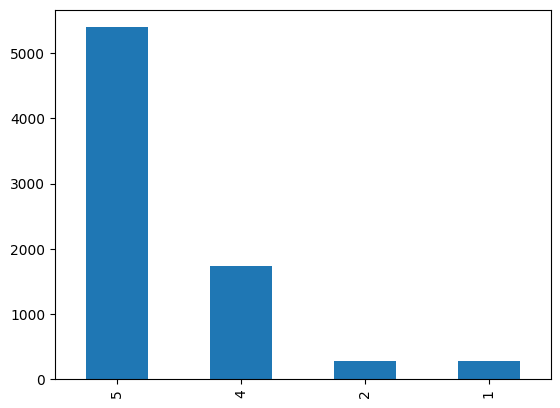

In [59]:
freq_df['Score'].value_counts().plot(kind='bar')

<Axes: >

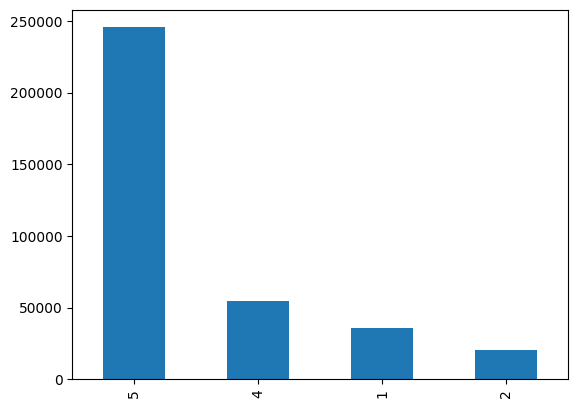

In [58]:
not_freq_df['Score'].value_counts().plot(kind='bar')

clearly the behaviour is almost same there is only slight difference 

Problem Statement 4:- Are frequent users more Verbose...?

In [60]:
data['Text']

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
568449    Great for sesame chicken..this is a good if no...
568450    I'm disappointed with the flavor. The chocolat...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, Length: 364171, dtype: object

In [61]:
def calculate_length(text):
    return len(text.split(' '))

In [62]:
data['Text_length'] = data['Text'].apply(calculate_length)

In [63]:
data.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type,Text_length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,not-frequent,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,not-frequent,31


In [66]:
not_freq_data = data[data['viewer_type']=='not-frequent']
freq_data = data[data['viewer_type']=='frequent']

In [67]:
not_freq_data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type,Text_length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,not-frequent,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,not-frequent,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,not-frequent,99
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,not-frequent,43
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,not-frequent,30
...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,2011-03-09,Will not do without,Great for sesame chicken..this is a good if no...,not-frequent,26
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,2012-03-09,disappointed,I'm disappointed with the flavor. The chocolat...,not-frequent,46
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,2012-02-21,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",not-frequent,71
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,2012-03-13,Favorite Training and reward treat,These are the BEST treats for training and rew...,not-frequent,37


(0.0, 600.0)

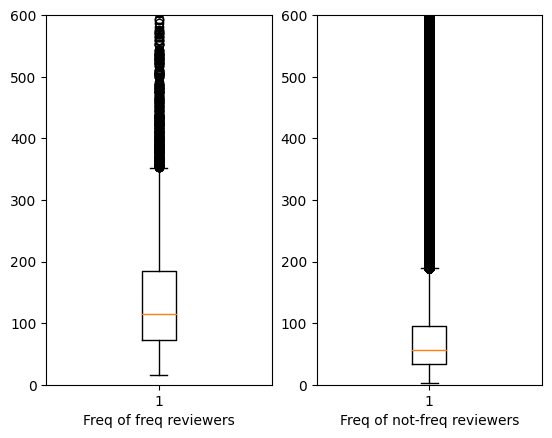

In [68]:
# define figure so that u can customize as per your need !
fig = plt.figure() 

#add subplots
ax1 = fig.add_subplot(121)
ax1.boxplot(freq_data['Text_length'])
ax1.set_xlabel('Freq of freq reviewers') ## adding xlabel
ax1.set_ylim(0,600) ## setting limit on y-axis..

ax2 = fig.add_subplot(122)
ax2.boxplot(not_freq_data['Text_length'])
ax2.set_xlabel('Freq of not-freq reviewers')
ax2.set_ylim(0,600)

cleary we can conclude here that Frequent Viewers are more verbose than the Non-freuquent one 

Sentiment Analysis of the Users 

In [71]:
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 1.2 MB/s eta 0:00:00a 0:00:01


In [72]:
from textblob import TextBlob

In [73]:
sample = data[0:50000]
#Sample data is carved out from the main data for the sake of sentiment Analysis to reduce the computational time 

In [74]:
polarity = []

for text in sample['Summary']: # list which will contain the polarity of the Summaries 
    try:
        polarity.append(TextBlob(text).sentiment.polarity)
    except:
        polarity.append(0)
    

In [75]:
sample['polarity'] = polarity

In [76]:
sample_negative= sample[sample['polarity']<0]

sample_positive= sample[sample['polarity']>0]

In [77]:
from collections import Counter

In [78]:
Counter(sample_positive['Summary']).most_common(10)

[('Delicious!', 233),
 ('Delicious', 216),
 ('Great product', 112),
 ('Excellent', 94),
 ('Great Product', 86),
 ('Love it!', 83),
 ('Great', 81),
 ('Great!', 73),
 ('Good stuff', 54),
 ('Awesome', 52)]

In [79]:
Counter(sample_negative['Summary']).most_common(10)

[('Disappointed', 45),
 ('Disappointing', 27),
 ('Awful', 17),
 ('Terrible', 15),
 ('Horrible', 15),
 ('Disgusting', 13),
 ('Bland', 13),
 ('Not good', 12),
 ("Don't waste your money", 12),
 ('Not what I expected', 11)]

The above are top 10 most negative feedback words and positive feedback words respectively